In [2]:
pip install celluloid

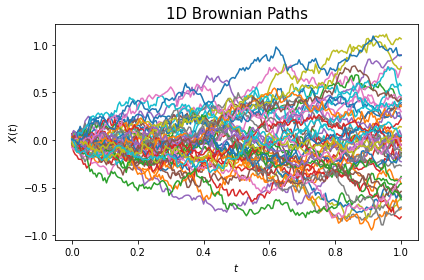

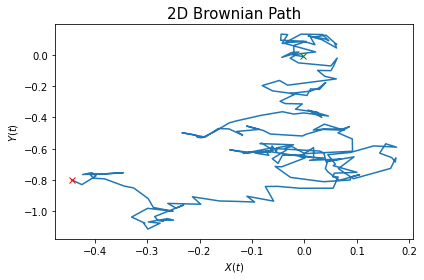

<Figure size 432x288 with 0 Axes>

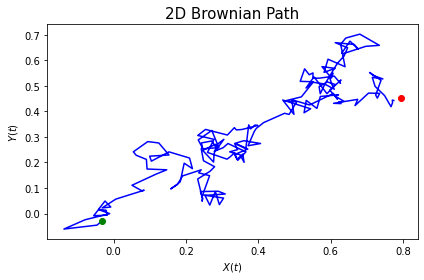

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
np.random.seed(5)

def brownian_1d(T=1.0, N=201, dt=1e-3, plot=True, filename="1D_Brownian.png") :
    t = np.linspace(0,T,N)
    x =  np.zeros(N)
    dx = np.zeros(N)
    dx[0] = x[0] = np.sqrt(dt) * np.random.randn()
    for i in range(1, N):
        dx[i] = np.sqrt(dt) * np.random.randn()
        x[i] = x[i-1] + dx[i]
    if plot :
        plt.plot(t, x)
        plt.xlabel("$t$")
        plt.ylabel("$X(t)$")
        plt.title('1D Brownian Path', fontsize=15)
        plt.xticks()
        plt.yticks()
        plt.tight_layout()
        plt.savefig(filename)
    return x, t

def brownian_1d_animate(T=1.0, N=201, dt=1e-3) :
    x, t = brownian_1d(T, N, dt, False)
    fig = plt.figure()
    camera = Camera(fig)
    for i in range(N) :
        plt.plot(t[:i], x[:i], color='blue')
        plt.xlabel("$t$")
        plt.ylabel("$X(t)$")
        plt.title('1D Brownian Path', fontsize=15)
        plt.xticks()
        plt.yticks()
        plt.tight_layout()
        camera.snap()
    animation = camera.animate()
    animation.save('1D_Brownian_animation.mp4')
    plt.clf()

def brownian_1d_n_paths(n=50, T=1.0, N=201, dt=1e-3) :
    paths = []
    t = None
    for _ in range(n) :
        x, t = brownian_1d(T, N, dt, False)
        paths.append(x)
    for x in paths :
        plt.plot(t, x)
    plt.xlabel("$t$")
    plt.ylabel("$X(t)$")
    plt.title('1D Brownian Paths', fontsize=15)
    plt.xticks()
    plt.yticks()
    plt.tight_layout()
    plt.savefig("1D_N_Brownian.png")

def brownian_2d(T=1.0, N=201, dt=1e-3, plot=True) :
    x, _ = brownian_1d(T, N, dt, False)
    y, _ = brownian_1d(T, N, dt, False)
    if plot:
        fig = plt.figure()
        plt.plot(x, y)
        plt.plot(x[0], y[0], 'gx')
        plt.plot(x[-1], y[-1], 'rx')
        plt.xlabel('$X(t)$')
        plt.ylabel('$Y(t)$')
        plt.title('2D Brownian Path', fontsize=15)
        plt.xticks()
        plt.yticks()
        plt.tight_layout()
        plt.savefig("2D_Brownian.png")
    
    return x, y

def brownian_2d_animate(T=1.0, N=201, dt=1e-3) :
    x, y = brownian_2d(T, N, dt, False)
    fig = plt.figure()
    camera = Camera(fig)
    for i in range(N) :
        plt.plot(x[:i], y[:i], color='blue')
        plt.plot(x[0], y[0], 'go')
        if i == N-1 :
            plt.plot(x[-1], y[-1], 'ro')
        plt.xlabel('$X(t)$')
        plt.ylabel('$Y(t)$')
        plt.title('2D Brownian Path', fontsize=15)
        plt.xticks()
        plt.yticks()
        plt.tight_layout()
        camera.snap()
    animation = camera.animate()
    animation.save('2D_Brownian_animation.mp4')

if __name__ == "__main__" :
    brownian_1d()
    brownian_1d_n_paths()
    brownian_2d()
    brownian_1d_animate()
    brownian_2d_animate()